<a href="https://colab.research.google.com/github/toriqultonu/Learning_PyTorch/blob/main/1803121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

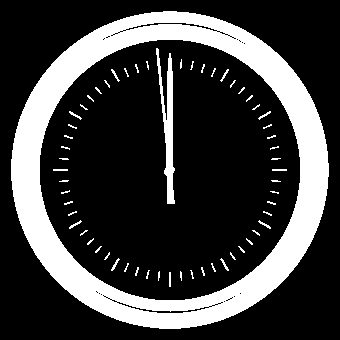

Binary Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Kernel for Morphological Transformations:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [8]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

image_path = '/content/clock2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(binary_image)
print("Binary Image:")
print(binary_image)

# kernel
kernel_size = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

print("Kernel for Morphological Transformations:")
print(kernel)

The necessary libraries are imported, including OpenCV, matplotlib, and the cv2_imshow function from the google.colab.patches module.

The variable image_path is assigned the path of the image file 'clock2.jpg' that is to be processed.

The image is read using OpenCV's cv2.imread() function with the cv2.IMREAD_GRAYSCALE flag, which reads the image as a grayscale image and stores it in the variable image.

The function cv2.threshold() is used to convert the grayscale image into a binary image. Pixels with intensity values greater than 127 are set to 255 (white), and pixels with intensity values less than or equal to 127 are set to 0 (black). The result is stored in the variable binary_image.

The binary image is displayed using the cv2_imshow() function from the google.colab.patches module.

The binary image is printed as a NumPy array using the print() function.

A kernel for morphological transformations is defined with a size of (5, 5) using cv2.getStructuringElement() function. The cv2.MORPH_RECT flag specifies a rectangular-shaped kernel. The kernel is stored in the variable kernel.

The kernel for morphological transformations is printed as a NumPy array using the print() function.

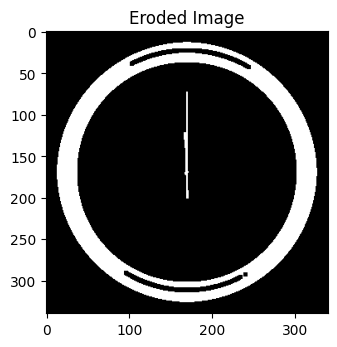

In [6]:
# erosion
def erosion(image, structuring_element):
    # dimensions
    img_height, img_width = len(image), len(image[0])
    se_height, se_width = len(structuring_element), len(structuring_element[0])

    se_center_y, se_center_x = se_height // 2, se_width // 2

    output_image = [[0 for _ in range(img_width)] for _ in range(img_height)]

    # erosion
    for y in range(img_height):
        for x in range(img_width):
            min_value = 255
            for i in range(se_height):
                for j in range(se_width):
                    img_y = y + i - se_center_y
                    img_x = x + j - se_center_x
                    if 0 <= img_y < img_height and 0 <= img_x < img_width:

                        if structuring_element[i][j] == 1:
                            min_value = min(min_value, image[img_y][img_x])

            output_image[y][x] = min_value

    return output_image

# erosion on the binary image
eroded_image = erosion(binary_image, kernel)

# Display the eroded image
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax1.imshow(eroded_image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Eroded Image')

The "erosion" function is defined to perform the erosion operation on a grayscale input image using a specified structuring element.

Inside the "erosion" function:

The dimensions of the input image and structuring element are obtained using the len() function.
The center position of the structuring element is calculated based on its height and width.
An empty output image of the same size as the input image is created to store the result of the erosion operation.
The function then proceeds to perform the erosion operation:

It iterates over each pixel (y, x) in the input image.
For each pixel, it iterates over each element (i, j) in the structuring element.
It calculates the corresponding position (img_y, img_x) in the input image for the current structuring element pixel (i, j).
It checks if the calculated position (img_y, img_x) is within the bounds of the input image.
If the corresponding pixel exists in the input image, it applies the erosion operation by finding the minimum pixel value among the pixels in the neighborhood where the structuring element has a value of 1.
The minimum value found is stored in the output image at the corresponding pixel (y, x).
After the erosion operation is performed, the function returns the resulting output image.

The code then applies the "erosion" function on the "binary_image" using the predefined "kernel" (structuring element) to obtain the "eroded_image".

Finally, it displays the eroded image using matplotlib by creating a plot and showing it with the title 'Eroded Image'. Note that the second subplot (ax2) has been commented out, so only one subplot is shown.

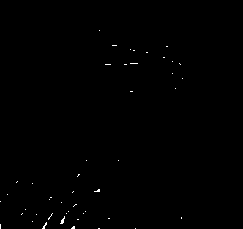

In [3]:
img_erosion = cv2.erode(binary_image, kernel, iterations=1)
cv2_imshow(img_erosion)

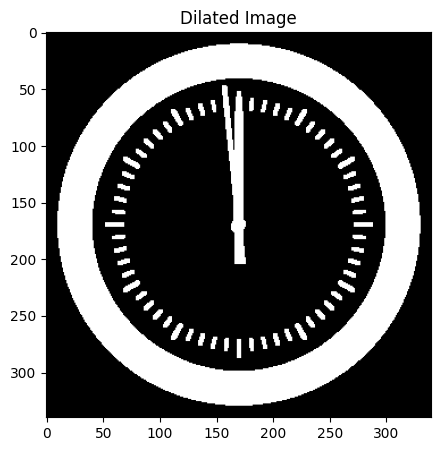

In [10]:
# dialation
def dilate_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    dilated_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if binary_image[i, j] == 255:  # Check if the pixel is part of the foreground
                dilated_image[i - offset:i + offset + 1, j - offset:j + offset + 1] = 255

    return dilated_image


kernel = np.ones((3, 3), np.uint8)


dilated_image = dilate_image(binary_image, kernel)


plt.figure(figsize=(10, 5))

plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.show()

The "dilate_image" function is defined to perform the dilation operation on a binary input image using a given kernel.

Inside the "dilate_image" function:

The function first determines the dimensions (rows and columns) of the input binary image.
The size of the kernel (kernel_size) is extracted from the shape of the kernel.
An offset is calculated as half of the kernel size, which represents the number of pixels to be expanded around each foreground pixel.
An output image "dilated_image" is created as a zero matrix with the same shape as the input binary image.
The function then proceeds to perform the dilation operation:

It iterates over each pixel (i, j) in the input binary image, except for the boundary regions defined by the offset.
For each foreground pixel (pixel with a value of 255), it expands the boundaries by setting all the pixels in the neighborhood defined by the kernel to 255 in the "dilated_image". The neighborhood is centered at the current foreground pixel.
This process effectively enlarges the white regions of the binary image.
After performing the dilation operation, the function returns the resulting "dilated_image".

The code creates a kernel using NumPy, which is a 3x3 matrix with all elements set to 1. This is a standard 3x3 kernel used for dilation operations.

The "dilate_image" function is called with the "binary_image" and the predefined "kernel" to obtain the "dilated_image".

Finally, the code uses matplotlib to display the "dilated_image" with a gray colormap and adds a title 'Dilated Image' to the plot.

<ipython-input-12-22f4e682654a>:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


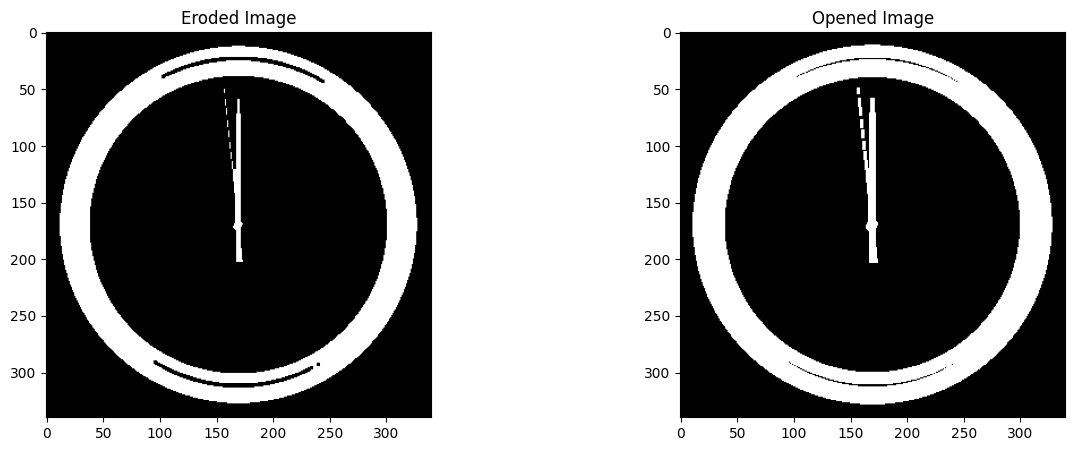

In [12]:
# opening operation
def erode_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    eroded_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if np.all(binary_image[i - offset:i + offset + 1, j - offset:j + offset + 1] == 255):
                eroded_image[i, j] = 255

    return eroded_image


kernel = np.ones((3, 3), np.uint8)


eroded_image = erode_image(binary_image, kernel)
opened_image = dilate_image(eroded_image, kernel)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.show()


The code defines two functions, "erode_image" and "dilate_image," for erosion and dilation operations, respectively.

Inside the "erode_image" function:

The function first determines the dimensions (rows and columns) of the input binary image.
The size of the kernel (kernel_size) is extracted from the shape of the kernel.
An offset is calculated as half of the kernel size, which represents the number of pixels to be considered around each foreground pixel during the erosion operation.
An output image "eroded_image" is created as a zero matrix with the same shape as the input binary image.
The "erode_image" function then proceeds to perform the erosion operation:

It iterates over each pixel (i, j) in the input binary image, except for the boundary regions defined by the offset.
For each foreground pixel (pixel with a value of 255), it checks if all the pixels in the neighborhood defined by the kernel have a value of 255. If this condition is met, it sets the corresponding pixel in the "eroded_image" to 255. Otherwise, it remains 0.
This process effectively shrinks the white regions of the binary image.
After performing the erosion operation, the function returns the resulting "eroded_image."

A kernel is created using NumPy, which is a 3x3 matrix with all elements set to 1. This is a standard 3x3 kernel used for erosion and dilation operations.

The "erode_image" function is called with the "binary_image" and the predefined "kernel" to obtain the "eroded_image."

The code then defines another function, "dilate_image," which was not shown in the provided code. However, we can infer from the variable "opened_image" that it performs the dilation operation. The "dilate_image" function is expected to have similar logic as the "erode_image" function but using the dilation operation.

After the erosion and dilation operations, the code displays the results using matplotlib:

It creates a subplot with two columns and one row to show both images side by side.
In the first subplot (left), it displays the "eroded_image" with a gray colormap and adds a title 'Eroded Image'.
In the second subplot (right), it displays the "opened_image" (result of dilation after erosion) with a gray colormap and adds a title 'Opened Image'.

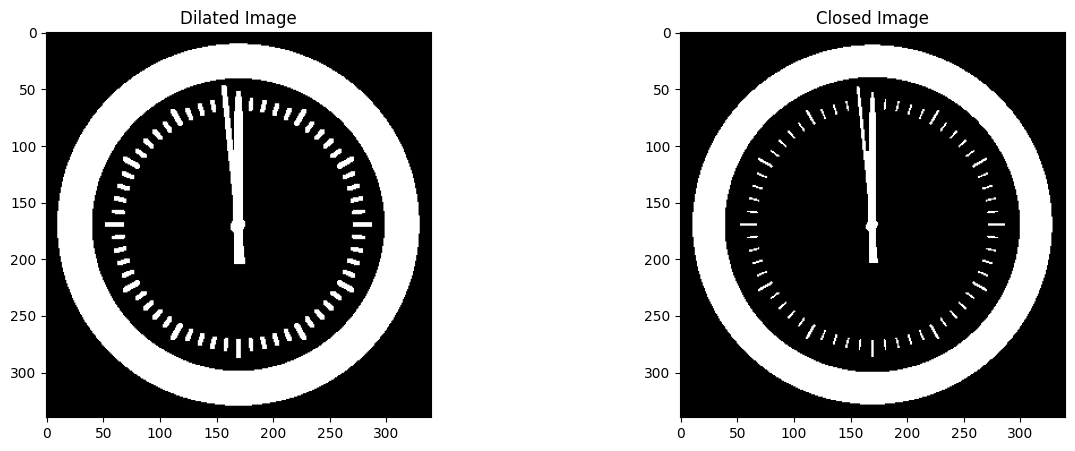

In [14]:
# closing operation
kernel = np.ones((3, 3), np.uint8)


dilated_image = dilate_image(binary_image, kernel)
closed_image = erode_image(dilated_image, kernel)


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.show()

A kernel is created using NumPy with dimensions (3, 3) and all elements set to 1. This is a standard 3x3 kernel used for dilation and erosion operations.

The code performs the dilation operation using the "dilate_image" function:

It calls the "dilate_image" function with the "binary_image" and the predefined "kernel" to obtain the "dilated_image".
The "dilate_image" function was not provided in the given code, but it is expected to perform the dilation operation using the kernel. We can infer that it has similar logic as the "erode_image" function but uses dilation instead.
The code then performs the erosion operation using the "erode_image" function:

It calls the "erode_image" function with the "dilated_image" (result of the previous dilation) and the same predefined "kernel" to obtain the "closed_image".
The "erode_image" function performs the erosion operation on the "dilated_image" using the kernel, and we can infer that it follows a similar logic as described in the previous explanation.
After the dilation and erosion operations, the code displays the results using matplotlib:

It creates a subplot with two columns and one row to show both images side by side.
In the first subplot (left), it displays the "dilated_image" with a gray colormap and adds a title 'Dilated Image'.
In the second subplot (right), it displays the "closed_image" (result of erosion after dilation) with a gray colormap and adds a title 'Closed Image'.

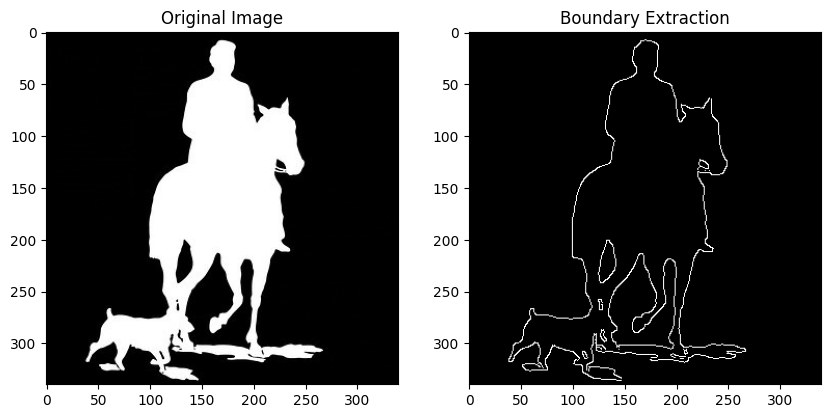

In [16]:
# boundary extraction
image = cv2.imread('/content/horse-dog.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


canny_image = cv2.Canny(blurred_image, 50, 150)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(canny_image, cmap='gray')
plt.title('Boundary Extraction')

plt.show()


The code applies Gaussian blur to the gray_image using the cv2.GaussianBlur() function:

The function takes three arguments: the input image (gray_image), the kernel size (5x5 in this case), and the standard deviation (sigma) set to 0, which means the function calculates it based on the kernel size.
The resulting blurred image is stored in the variable blurred_image.
The code performs Canny edge detection on the blurred_image using the cv2.Canny() function:

The function takes three arguments: the input image (blurred_image), the lower threshold value (50), and the upper threshold value (150).
The Canny algorithm uses these thresholds to detect edges in the image based on the intensity gradient.
The resulting edge-detected image is stored in the variable canny_image.
The code then displays the original image and the boundary-extracted (edge-detected) image side by side using matplotlib:

It creates a subplot with two columns and one row to show both images side by side.
In the first subplot (left), it displays the image using the cv2.cvtColor() function to convert the BGR format to RGB format. It adds a title 'Original Image'.
In the second subplot (right), it displays the canny_image with a gray colormap. It adds a title 'Boundary Extraction'.